VoxCeleb2

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from ..audio import *
path = Config.data_path() / 'voxceleb-small'

In [33]:
config = AudioTransformConfig()
config.segment_size = 1000
# config.remove_silence = True
config.f_max = 8000
config.to_db_scale = True
config.top_db = 80
# config.silence_threshold = 30
config.max_to_pad = 1000
# config.silence_padding = 300

audios = AudioList.from_folder(path, recurse=True, config=config).split_by_rand_pct(.2, seed=4).label_from_folder()

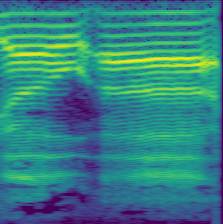

1526


In [34]:
audios.train[6][0].show()
print(audios.c)

In [35]:
tfm_sg_shift.use_on_y = False
tfm_sg_aug.use_on_y = False
tfms = [tfm_sg_aug], []
db = audios.transform(tfms).databunch(bs=64)
# print(db)
# db.show_batch()
learn = audio_learner(db)

AudioDataBunch;

Train: AudioLabelList (86775 items)
x: AudioList
AudioItem 0.9344375sec(14951 @ 16000hz),AudioItem 0.9344375sec(14951 @ 16000hz),AudioItem 0.934375sec(14950 @ 16000hz),AudioItem 0.934375sec(14950 @ 16000hz),AudioItem 0.934375sec(14950 @ 16000hz)
y: CategoryList
feQf4mh32JI,feQf4mh32JI,feQf4mh32JI,feQf4mh32JI,feQf4mh32JI
Path: /home/h/.fastai/data/voxceleb-small;

Valid: AudioLabelList (21389 items)
x: AudioList
AudioItem 0.9728125sec(15565 @ 16000hz),AudioItem 0.9728125sec(15565 @ 16000hz),AudioItem 0.9728125sec(15565 @ 16000hz),AudioItem 0.9728125sec(15565 @ 16000hz),AudioItem 0.97275sec(15564 @ 16000hz)
y: CategoryList
ngsjY9aa6MM,ngsjY9aa6MM,ngsjY9aa6MM,ngsjY9aa6MM,ngsjY9aa6MM
Path: /home/h/.fastai/data/voxceleb-small;

Test: None


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


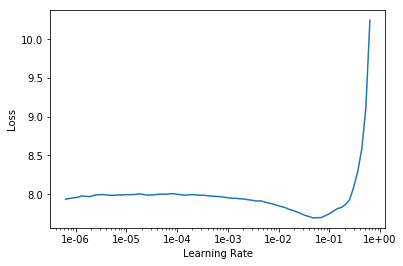

In [36]:
learn.lr_find()
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(3, slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,2.124198,1.754351,0.604096,03:49
1,0.992274,0.712619,0.819113,02:28
2,0.560954,0.456662,0.866894,02:31
